In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.markers as mrk
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro
from scipy.stats import levene


In [23]:
def DoStatsUnpaired(data1,data2,alpha=0.05):


    """
    DoStatsUnpaired automaticaly checks normal distribution with shapiro and does testing on unrelated groups, for example
    the same croptype, but from different fields, by same conditions.
    """
    #alpha = 0.05
    stat, p = shapiro(data1) 
    stat1, p2 = shapiro(data2)
    stat2, p3 = levene(data1,data2)
    
    if p > alpha and p2 > alpha and p3 > alpha:
        print("shapiro test {:.2} {:.2} > alpha {:.2} - normal distributed -> p {:.2} of levene test not significant -variance homogeneity assured, going parametric (T-Test unpaired)".format(p,p2,alpha,p3))
        from scipy.stats import ttest_ind
        stat, p = ttest_ind(data1, data2)
        if p > alpha:
            print('Same distribution p{:.2} > {:.2} not significant (fail to reject H0)'.format(p,alpha))
        else:
            print('Different distribution p{:.2} < {:.2} significant, one group is bigger than the other (reject H0)'.format(p,alpha)) 
    else:
        #hey hier mehr elif einbauen, momentan keine richtige differenzierung zwischen normal dist und levene!
        print("shapiro test {:.2} or {:.2} < alpha {:.2} - not normal distributed -> p {:.2} of levene test significant! - variance homogeneity not given going non parametric(mannwhitneyu test)".format(p,p2,alpha,p3))
        from scipy.stats import mannwhitneyu
        stat, p = mannwhitneyu(data1,data2)
        if p > alpha:
            print('Same distribution p {:.2} > {:.2} not significant (fail to reject H0)Stat:{}'.format(p,alpha,stat))
        else:
            print('Different distribution p {:.2} < {:.2} significant, one group is bigger than the other (reject H0)Stat:{}'.format(p,alpha,stat)) 
    data = [data1,data2]
    plt.figure(figsize=(9,8))
    bp_dict=plt.boxplot(data,labels=(data1.name, data2.name), showmeans=True, meanline=True, notch=True, bootstrap=1000)
    for line in bp_dict['medians']:
        # get position data for median line
        
        x, y = line.get_xydata()[1] # top of median line
        # overlay median value
        plt.text(x,y,round(y,2), horizontalalignment='left') # draw above, centered
    for line in bp_dict['means']:
        # get position data for mean line
        x, y = line.get_xydata()[0] # top of mean line
        # overlay mean value
        plt.text(x,y-0.01,round(y,2),horizontalalignment='right') # draw above, centered
    #plt.legend(['mean',"median"], loc='upper right')
    #This code is totally not good, but works:
    plt.plot([],linestyle="--",marker=None, color='#2ca02c', label='mean')
    plt.plot([],linestyle='-', color='#ff881f', label='median')
    plt.legend()
    plt.show()

0.925 0.71425
1.925 0.60655


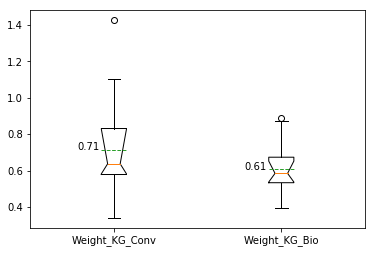

1.0 57.9
2.0 61.95


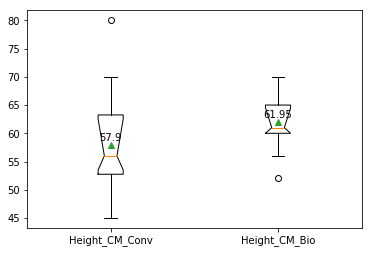

In [31]:
##Parameter Testing, choosed to only manipulate x-axis because of same value space.
## measurements for y would be more complicated because for  boxplots its a axis with variance.
data1,data2=df.Weight_KG_Conv,df.Weight_KG_Bio
data = [df.Weight_KG_Conv,df.Weight_KG_Bio]
bp_dict=plt.boxplot(data,labels=(data1.name, data2.name), showmeans=True, meanline=True, notch=True, bootstrap=1000)

for line in bp_dict['means']:
        # get position data for mean line
        x, y = line.get_xydata()[0] # top of mean line
        plt.text(x-0.01,y,round(y,2),horizontalalignment='right')
        print(x,y)
plt.show()

data1,data2=df.Height_CM_Conv,df.Height_CM_Bio
data = [df.Height_CM_Conv,df.Height_CM_Bio]
bp_dict=plt.boxplot(data,labels=(data1.name, data2.name), showmeans=True, meanline=False, notch=True, bootstrap=1000)

for line in bp_dict['means']:
        # get position data for mean line
        x, y = line.get_xydata()[0] # top of mean line
        plt.text(x,y+0.8,round(y,2),horizontalalignment='center')
        print(x,y)
plt.show()

In [71]:
#Not as up to date as unpaired, sorry future me.
def DoStatsPaired(data1,data2,alpha = 0.05):
    """
    DoStatsPaired automaticaly checks normal distribution with shapiro and does paired testing, for example
    the same persons groups, but on different time.
    """
    
    from scipy.stats import ttest_ind
    from scipy.stats import mannwhitneyu
    
    stat, p = shapiro(data1) 
    stat1, p2 = shapiro(data2)

    if p > alpha and p2 > alpha:
        print("shapiro test {:.2} {:.2} > alpha {:.2} -> normal distributed, going parametric (T-Test paired)".format(p,p2,alpha))
        from scipy.stats import ttest_rel
        stat, p = ttest_rel(data1, data2)
        if p > alpha:
            print('Same distribution p{:.2} > {:.2} not significant (fail to reject H0)'.format(p,alpha))
        else:
            print('Different distribution p{:.2} < {:.2} significant, one group is bigger than the other (reject H0)'.format(p,alpha)) 
    else:
        print("shapiro test {:.2} or {:.2} < alpha {:.2} -> not normal distributed, going non parametric(wilcoxon test (paired))".format(p,p2,alpha))
        from scipy.stats import wilcoxon
        stat, p = wilcoxon(data1, data2)
        if p > alpha:
            print('Same distribution p {:.2} > {:.2} not significant (fail to reject H0) Stat:{}'.format(p,alpha,stat))
        else:
            print('Different distribution p {:.2} < {:.2} significant, one group is bigger than the other (reject H0)Stat:{}'.format(p,alpha,stat))
    
    #df.boxplot(column=[data1.name, data2.name], figsize=(10,10),showmeans=True,notch=False)
    data= [data1,data2]
    plt.figure(figsize=(10,10))
    bp_dict=plt.boxplot(data,labels=(data1.name, data2.name), showmeans=True, meanline=False, notch=True, bootstrap=1000)
    for line in bp_dict['medians']:
        # get position data for median line
        
        x, y = line.get_xydata()[1] # top of median line
        # overlay median value
        plt.text(x+0.01,y,round(y,2), horizontalalignment='left') # draw above, centered
    for line in bp_dict['means']:
        # get position data for median line
        x, y = line.get_xydata()[0] # top of median line
        # overlay median value
        plt.text(x,y+0.015,round(y,2),horizontalalignment='center') # draw above, centered
    plt.show()

In [4]:
df = pd.read_csv("plant_data.csv",sep=";",decimal=",")

In [ ]:
#df=df.drop(columns="Unnamed: 5")

In [5]:
df.head()

,Höhe in cm konventionell,Höhe in cm ökologisch,Höhe in cm konventionell Tag 2,Höhe in cm ökologisch Tag 2,Gewicht in Kg konventionell,Gewicht in Kg ökologisch,Gewicht in Kg ökologisch (inkl. Unkräuter),Weed_Conv,Weed_Bio,Cover_Perc_Konv,Cover_Perc_Bio
0,70,62,86,77,1.105,0.590,0.6195,0,4,90,75
1,65,65,62,77,0.825,0.685,0.7145,0,4,50,75
2,65,64,68,77,0.690,0.490,0.5195,0,3,50,75
3,57,63,67,70,0.835,0.530,0.5595,0,3,75,75
4,60,60,74,70,0.845,0.685,0.7145,1,5,75,75


In [6]:
df.plot.bar?

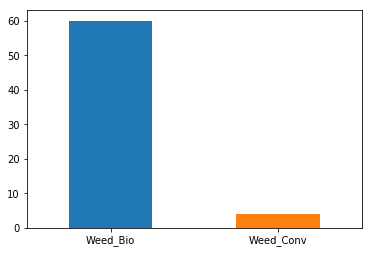

In [7]:

df[["Weed_Bio","Weed_Conv"]].sum().plot.bar(rot=0)

In [8]:
df.describe(include='all')

,Höhe in cm konventionell,Höhe in cm ökologisch,Höhe in cm konventionell Tag 2,Höhe in cm ökologisch Tag 2,Gewicht in Kg konventionell,Gewicht in Kg ökologisch,Gewicht in Kg ökologisch (inkl. Unkräuter),Weed_Conv,Weed_Bio,Cover_Perc_Konv,Cover_Perc_Bio
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,57.900000,61.950000,70.100000,77.500000,0.714250,0.606550,0.636050,0.200000,3.000000,71.000000,72.000000
std,8.391098,4.260899,9.475175,4.123106,0.250732,0.126907,0.126907,0.523148,1.256562,13.533584,10.052494
min,45.000000,52.000000,54.000000,70.000000,0.340000,0.395000,0.424500,0.000000,1.000000,50.000000,50.000000
25%,52.750000,60.000000,65.000000,76.500000,0.578750,0.533750,0.563250,0.000000,2.000000,68.750000,75.000000
50%,56.000000,61.000000,68.000000,78.000000,0.637500,0.585000,0.614500,0.000000,3.000000,75.000000,75.000000
75%,63.250000,65.000000,74.500000,80.000000,0.831250,0.673750,0.703250,0.000000,4.000000,75.000000,75.000000
max,80.000000,70.000000,93.000000,83.000000,1.425000,0.890000,0.919500,2.000000,6.000000,90.000000,90.000000


In [9]:
for key,value in df.iteritems():
    stat, p = shapiro(value)
    alpha = 0.05
    if p > alpha:
        print('{} is normal distributed {:.3}+'.format(value.name,p ))
    else:
        print('{} is not normal distributed {:.3}-'.format(value.name,p ))

Höhe in cm konventionell is normal distributed 0.344+
Höhe in cm ökologisch is normal distributed 0.444+
Höhe in cm konventionell Tag 2 is normal distributed 0.555+
Höhe in cm ökologisch Tag 2 is not normal distributed 0.0481-
Gewicht in Kg konventionell  is not normal distributed 0.0387-
Gewicht in Kg ökologisch is normal distributed 0.206+
Gewicht in Kg ökologisch (inkl. Unkräuter) is normal distributed 0.206+
Weed_Conv is not normal distributed 1.09e-07-
Weed_Bio is not normal distributed 0.0329-
Cover_Perc_Konv is not normal distributed 0.000238-
Cover_Perc_Bio  is not normal distributed 1.84e-06-


shapiro test 0.039 or 0.21 < alpha 0.05 - not normal distributed -> p 0.094 of levene test significant! - variance homogeneity not given going non parametric(mannwhitneyu test)
Same distribution p 0.16 > 0.05 not significant (fail to reject H0)Stat:163.0


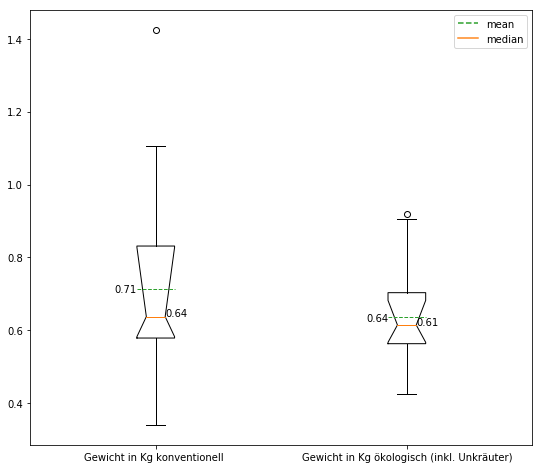

In [24]:
DoStatsUnpaired(df['Gewicht in Kg konventionell '],df['Gewicht in Kg ökologisch (inkl. Unkräuter)'],0.05)

shapiro test 0.039 or 0.21 < alpha 0.05 -> not normal distributed, going non parametric(mannwhitneyu test)
Same distribution p 0.065 > 0.05 not significant (fail to reject H0)Stat:143.5


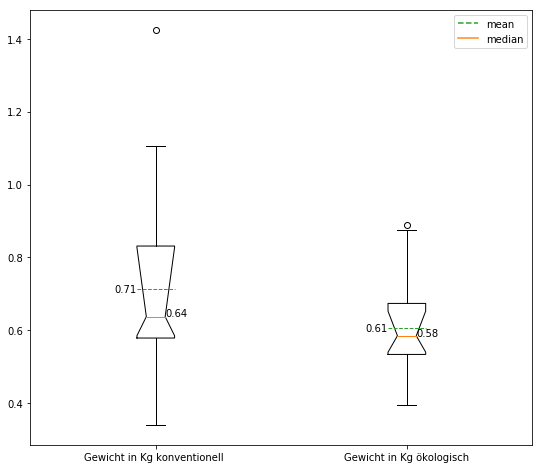

In [11]:
DoStatsUnpaired(df['Gewicht in Kg konventionell '],df['Gewicht in Kg ökologisch'],0.05)

shapiro test 0.34 or 0.44 < alpha 0.05 -> not normal distributed, going non parametric(mannwhitneyu test)
Different distribution p 0.017 < 0.05 significant, one group is bigger than the other (reject H0)Stat:121.5


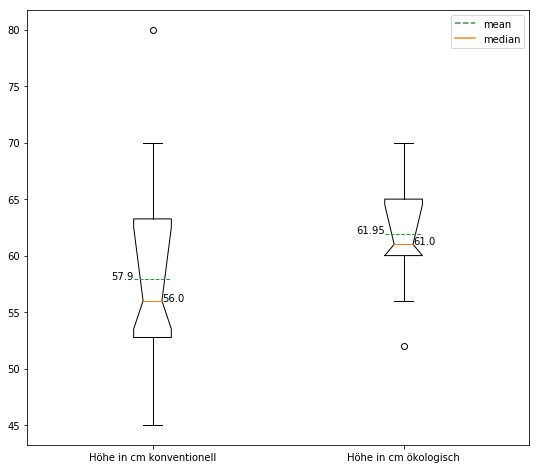

In [12]:
#DoStatsUnpaired(df.Height_CM_Conv,df.Height_CM_Bio,0.05)
DoStatsUnpaired(df["Höhe in cm konventionell"],df["Höhe in cm ökologisch"],0.05)

shapiro test 0.56 or 0.048 < alpha 0.05 -> not normal distributed, going non parametric(mannwhitneyu test)
Different distribution p 0.00054 < 0.05 significant, one group is bigger than the other (reject H0)Stat:79.0


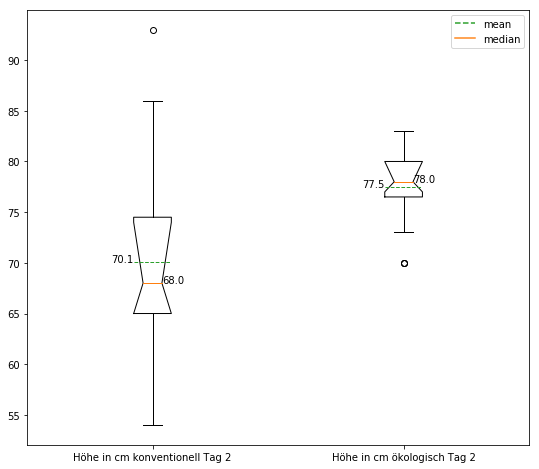

In [109]:
#DoStatsUnpaired(df.Height_CM_Conv_Day2,df.Height_CM_Bio_Day2,0.05)
DoStatsUnpaired(df["Höhe in cm konventionell Tag 2"],df["Höhe in cm ökologisch Tag 2"],0.05)

In [ ]:
#Mann-Whitney U Test ob sich die Höhe der Proben signifikant unterscheidet.
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(df.Height_CM_Conv, df.Height_CM_Bio)
print('Statistics={}, p={:.3}'.format(stat, p))
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution, one group is bigger than the other (reject H0)')

In [ ]:
#Mann-Whitney U Test ob sich das Gewicht der Proben signifikant unterscheidet.
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(df.Weight_KG_Conv, df.Weight_KG_Bio)
print('Statistics={}, p={:.3}'.format(stat, p))
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

In [ ]:
#Mann-Whitney U Test für den Unkraut Anteil.
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(df.Weed_Conv, df.Weed_Bio , alternative="two-sided")
print('Statistics={}, p={:.3}'.format(stat, p))
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

In [ ]:
import rpy2
print(rpy2.__version__)
%load_ext rpy2.ipython

In [ ]:
%%R -i df -w 900 -h 450 -u px

## Everything in here is ** R ** (magic)

#print(df) # Tada, df is now an R dataframe

wilcox.test(df$Weight_KG_Conv, df$Weight_KG_Bio,paired = FALSE, alternative="greater")
#wilcox.test(df$Height_CM_Conv, df$Height_CM_Bio, paired = TRUE)

#t.test(df$Weight_KG_Conv, df$Weight_KG_Bio, paired = TRUE)

In [ ]:
0.1298/2

In [ ]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(data1, data2)
from scipy.stats import wilcoxon
wilcoxon(df.Weight_KG_Conv, df.Weight_KG_Bio)

In [ ]:
plt.figure?

In [ ]:
x = df.Weight_KG_Conv
y = df.Weight_KG_Bio

data = [x,y]

plt.figure()
plt.boxplot(data, showmeans=True, meanline=True, notch=True, bootstrap=1000)
# creating background points is a bit tricky
for i in range(len(data)):                                    # für jedes i in der Reichweite der länge von data
    jitter_y = data[i]                                        # y values are the data points
    jitter_x = np.random.normal(i+1,0.04, size=len(jitter_y)) # x values are the number of the box and some noise
    plt.scatter(jitter_x,jitter_y, alpha=0.3)                 # makre sure to make jitter transparent
plt.show()


In [ ]:
x = df.Height_CM_Conv
y = df.Height_CM_Bio

data = [x,y]

plt.figure()
plt.boxplot(data, showmeans=True, meanline=True, notch=True, bootstrap=1000)
# creating background points is a bit tricky
for i in range(len(data)):                                    # für jedes i in der Reichweite der länge von data
    jitter_y = data[i]                                        # y values are the data points
    jitter_x = np.random.normal(i+1,0.04, size=len(jitter_y)) # x values are the number of the box and some noise
    plt.scatter(jitter_x,jitter_y, alpha=0.3)                 # makre sure to make jitter transparent
plt.show()

In [ ]:
print(data)